In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# required for importin modules from other directories
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
from common import misc
from common.data_parser import *
from config import *


In [ ]:
df_list = parse_companies()

plt.style.use("seaborn")
labels = ["Year 1", "Year 2", "Year 3", "Year 4", "Year 5"]
not_bancrupt = [df["class"].value_counts()[0] for df in df_list]
bancrupt = [df["class"].value_counts()[1] for df in df_list]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, not_bancrupt, width, label='not bancrupt')
rects2 = ax.bar(x + width/2, bancrupt, width, label='bancrupt')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('n')
ax.set_title('Number of solvent and bancrupt companies per year')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

misc.create_out_dir()
plt.savefig("out/companies_histrogram")
plt.show()


In [ ]:
def plot_corr_heatmap(df, fmt=".2f", feat_to_ret="Class", ticksfont=12,abs = True):
    df = df.replace("solvent",0)
    df = df.replace("bancrupt",1)
    plt.rcParams.update({'font.size': 14, 'font.weight': 'bold'})
    # Compute correlations and save in matrix
    if abs:
        corr = np.abs(df.corr()) # We only used absolute values for visualization purposes! ..."hot-cold" view to just sort between 
    else:
        corr = df.corr()

    # Mask the repeated values --> here: upper triangle

    #print(corr)
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True # mask upper triangle

    corr_to_feat = corr.loc[:,feat_to_ret]
    
    f, ax = plt.subplots(figsize=(18, 16))
    sns.heatmap(corr, annot=True, fmt=fmt , mask=mask, vmin=0, vmax=1, linewidths=.5,cmap="YlGnBu")
    plt.tick_params(labelsize=ticksfont)
    return corr_to_feat

plot_corr_heatmap(df_list[4], feat_to_ret="class")

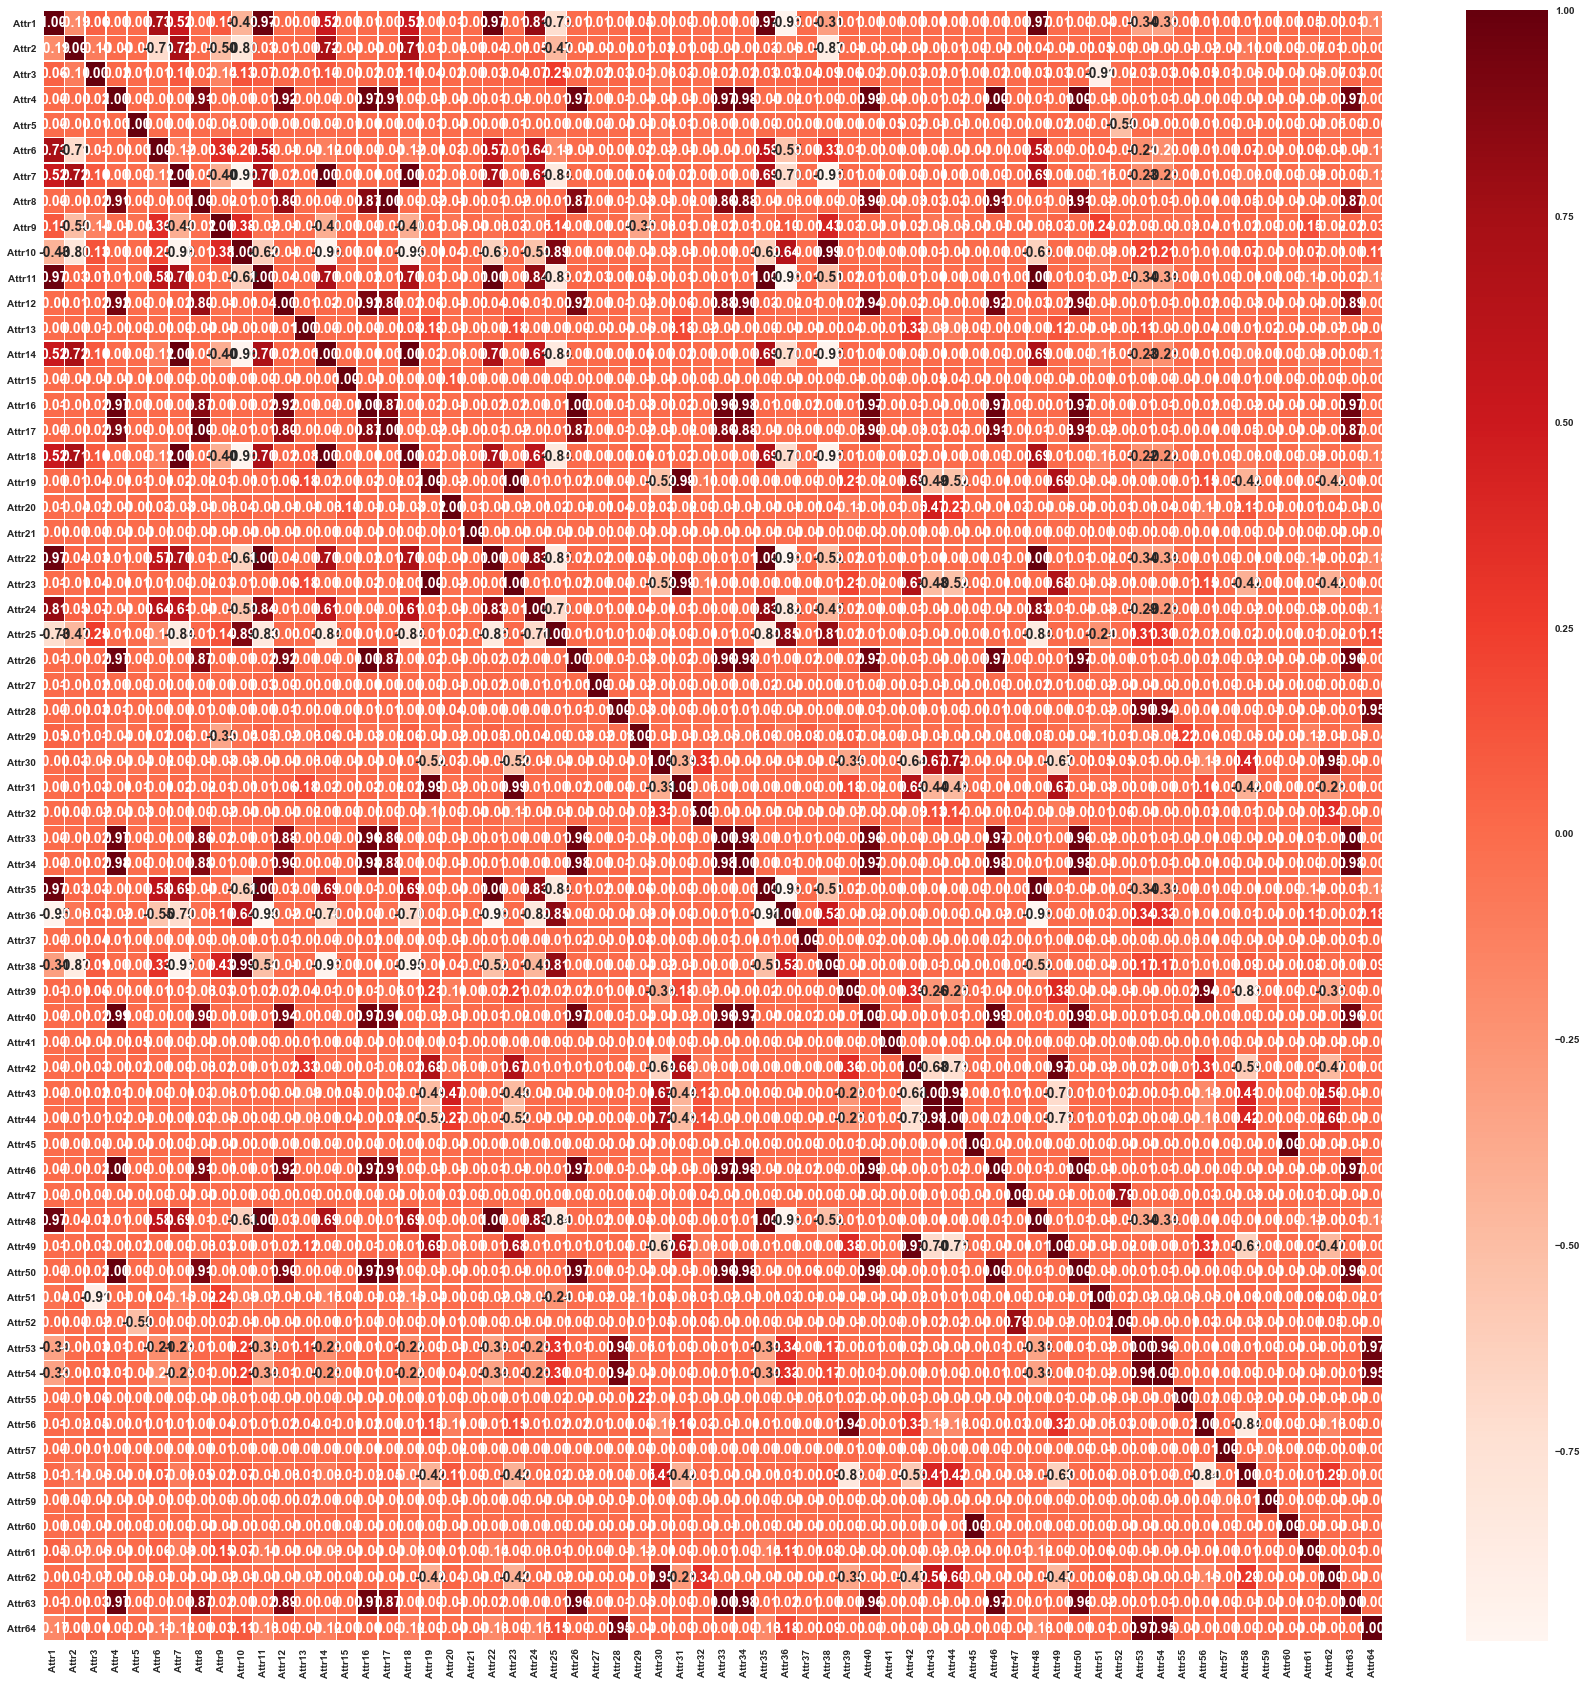

In [10]:
df = df_list[4]
cor = df.corr()
plt.figure(figsize=(50,50))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt=".2f", linewidths=.5)
plt.show()